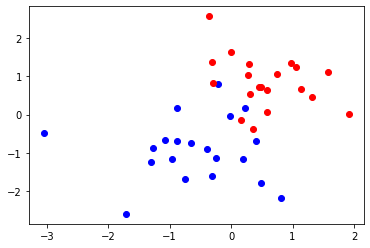

In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

N = 20
np.random.seed(0)
n_features = 2
sigma = 0.8
X_cls_1 = np.array([-1, -1]) + sigma * np.random.randn(N, n_features)
X_cls_2 = np.array([1, 1]) + sigma * np.random.randn(N, n_features)

X = np.vstack([X_cls_1, X_cls_2])
y = np.array([-1] * N + [1] * N)

plt.scatter(X_cls_1[:, 0], X_cls_1[:, 1], color='blue')
plt.scatter(X_cls_2[:, 0], X_cls_2[:, 1], color='red')

In [2]:
clf = LinearSVC(C=0.1)
clf.fit(X, y)
y_hat = clf.predict(X)

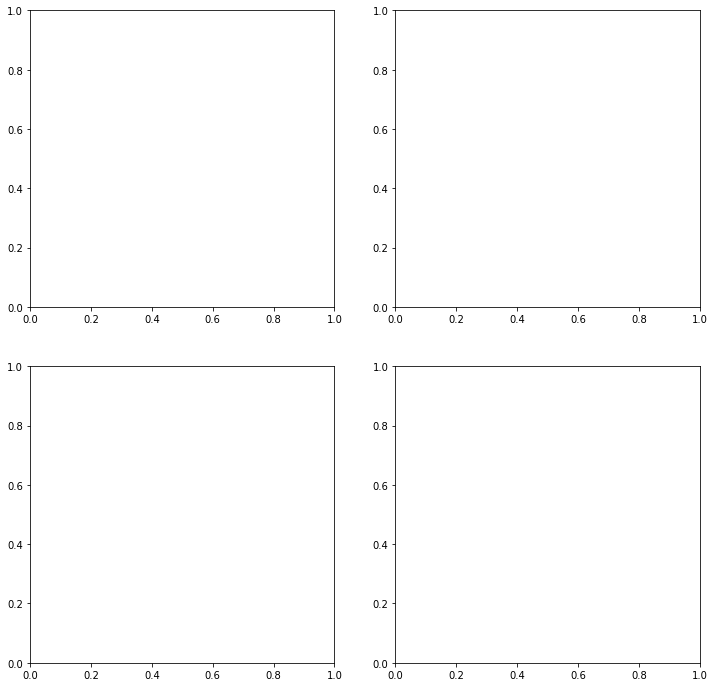

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

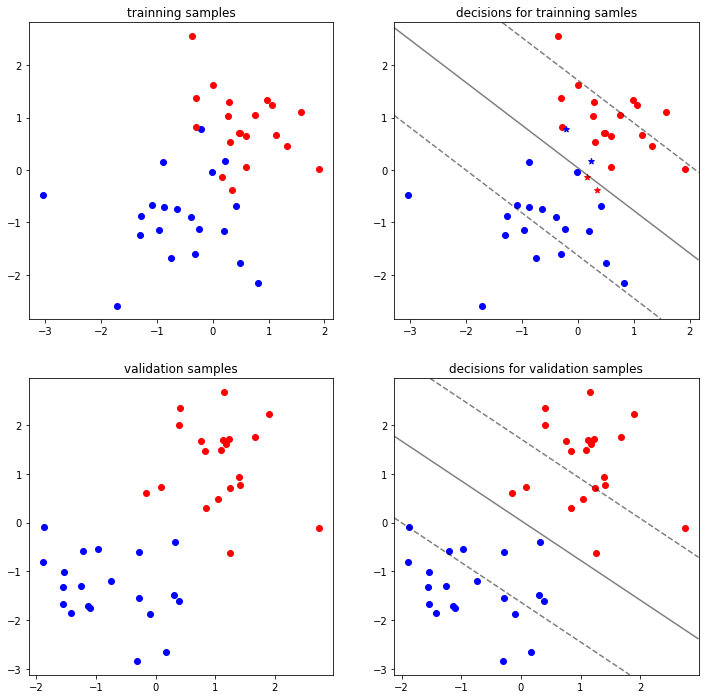

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

INDEX_AX_TRAIN_DATA = (0, 0)
INDEX_AX_TRAIN = (0, 1)
INDEX_AX_VAL_DATA = (1, 0)
INDEX_AX_VAL = (1, 1)

axes[INDEX_AX_TRAIN_DATA].set_title('trainning samples')
axes[INDEX_AX_TRAIN_DATA].scatter(X_cls_1[:, 0], X_cls_1[:, 1], color='blue')
axes[INDEX_AX_TRAIN_DATA].scatter(X_cls_2[:, 0], X_cls_2[:, 1], color='red')

def get_X(X, is_pos=True, is_suc=True):
    is_pos_array = (y == 1) if is_pos else (y == -1)
    is_suc_array = (y * y_hat > 0) if is_suc else (y * y_hat <= 0)
    return np.take(X, indices=np.where(is_pos_array & is_suc_array)[0], axis=0)

# 元の図
axes[INDEX_AX_TRAIN].set_title('decisions for trainning samles')
# 正例 かつ 正解
X_pos_suc = get_X(X, is_pos=True, is_suc=True)
axes[INDEX_AX_TRAIN].scatter(X_pos_suc[:, 0], X_pos_suc[:, 1], color='red')
# 正例 かつ x
X_pos_fail = get_X(X, is_pos=True, is_suc=False)
axes[INDEX_AX_TRAIN].scatter(X_pos_fail[:, 0], X_pos_fail[:, 1], color='red', marker='*')
# 負例 かつ 正解
X_neg_suc = get_X(X, is_pos=False, is_suc=True)
axes[INDEX_AX_TRAIN].scatter(X_neg_suc[:, 0], X_neg_suc[:, 1], color='blue')
# 負例 かつ x
X_neg_fail = get_X(X, is_pos=False, is_suc=False)
axes[INDEX_AX_TRAIN].scatter(X_neg_fail[:, 0], X_neg_fail[:, 1], color='blue', marker='*')

xlim = axes[INDEX_AX_TRAIN].get_xlim()
ylim = axes[INDEX_AX_TRAIN].get_ylim()
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[INDEX_AX_TRAIN].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=["--", '-', "--"])

# --- 検証
N = 20
np.random.seed(1)
n_features = 2
sigma = 0.8
X_cls_1_val = np.array([-1, -1]) + sigma * np.random.randn(N, n_features)
X_cls_2_val = np.array([1, 1]) + sigma * np.random.randn(N, n_features)
     
axes[INDEX_AX_VAL_DATA].set_title('validation samples')
axes[INDEX_AX_VAL_DATA].scatter(X_cls_1_val[:, 0], X_cls_1_val[:, 1], color='blue')
axes[INDEX_AX_VAL_DATA].scatter(X_cls_2_val[:, 0], X_cls_2_val[:, 1], color='red')
     
X_val = np.vstack([X_cls_1_val, X_cls_2_val])
y = np.array([-1] * N + [1] * N)

axes[INDEX_AX_VAL].set_title('decisions for validation samples')
axes[INDEX_AX_VAL].scatter(X_cls_1_val[:, 0], X_cls_1_val[:, 1], color='blue')
axes[INDEX_AX_VAL].scatter(X_cls_2_val[:, 0], X_cls_2_val[:, 1], color='red')

xlim = axes[INDEX_AX_VAL].get_xlim()
ylim = axes[INDEX_AX_VAL].get_ylim()
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[INDEX_AX_VAL].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=["--", '-', "--"])

# 
plt.show()